## A jupyter notebook version file for the `main.py`


Set `autoreload` to execute the change in `.py` files.


In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import _pickle
import natsort
from pathlib import Path
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from __utils__ import images_processing
from __utils__ import labels_processing
from __utils__ import labeling
from __utils__ import loso_preparing
from __utils__ import spotting

In [24]:
dataset_dir = "D:/Databases/SAMM_longvideos"
# dataset_dir = "F:/HEH/Databases/SAMM_longvideos"
# dataset_dir = "/data/disk1/heh/databases/SAMM_longvideos"

test_dataset_dir = "D:/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "F:/HEH/Databases/MEGC2022_testSet/SAMM_Test_cropped"
# test_dataset_dir = "/data/disk1/heh/databases/MEGC2022_testSet/SAMM_Test_cropped"

images_loading = False
image_size = 128
load_cropped_images = False
# expression_type = "mae"  # macro-expression spotting
expression_type = "me"  # micro-expression spotting
debug_preds = True
labeling_function = "pseudo_labeling"
# labeling_function = "original_labeling"
model_names = {
    0: "SOFTNet",
    1: "SOFTNetCBAM",
    2: "ViT-B",
    3: "SL-ViT-B",
    4: "Swin-T",
    5: "Swin-S",
    6: "L-Swin-T",
    7: "S-Swin-T",
    8: "SL-Swin-T",
    9: "SL-Swin-S",
}
model_name = model_names[8]
batch_size = 48
epochs = 25
save_preds = False
test_preds_parent = Path(test_dataset_dir).parent / Path(
    Path(test_dataset_dir).name.split("_")[0]
    + "_"
    + Path(test_dataset_dir).name.split("_")[1],
    "preds",
)
test_preds_stem = (
    f"{expression_type}_"
    + model_name.lower().replace("-", "_")
    + f"_batch_size_{batch_size}"
    + f"_epochs_{epochs}"
    + f"_{labeling_function}"
    + f"_{image_size}"
)
test_preds_path = Path(test_preds_parent, test_preds_stem).with_suffix(".pkl")
print(f"test_preds_path: {test_preds_path}")

test_preds_path: D:\Databases\MEGC2022_testSet\SAMM_Test\preds\me_sl_swin_t_batch_size_48_epochs_25_pseudo_labeling_128.pkl


## Load Training Images


When debug the image processing, the videos_images is from cropped_rawpic, whereas the other variables are from rawpic.


In [25]:
videos_images, subjects, subjects_videos_code = images_processing.load_images(
    dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

subject_video: 006_1
subject_video: 006_2
subject_video: 006_3
subject_video: 006_4
subject_video: 006_5
subject_video: 006_6
subject_video: 006_7
subject_video: 007_3
subject_video: 007_4
subject_video: 007_5
subject_video: 007_6
subject_video: 007_7
subject_video: 008_1
subject_video: 008_5
subject_video: 008_6
subject_video: 008_7
subject_video: 009_2
subject_video: 009_3
subject_video: 009_4
subject_video: 009_6
subject_video: 009_7
subject_video: 010_1
subject_video: 010_2
subject_video: 010_3
subject_video: 010_4
subject_video: 010_5
subject_video: 010_6
subject_video: 010_7
subject_video: 011_1
subject_video: 011_2
subject_video: 011_3
subject_video: 011_4
subject_video: 011_5
subject_video: 011_6
subject_video: 011_7
subject_video: 012_3
subject_video: 012_4
subject_video: 012_5
subject_video: 012_6
subject_video: 012_7
subject_video: 013_1
subject_video: 013_2
subject_video: 013_3
subject_video: 013_6
subject_video: 013_7
subject_video: 014_1
subject_video: 014_2
subject_video

In [26]:
print("subjects:", subjects)
print("subjects_videos_code:", subjects_videos_code)

subjects: ['006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '028', '030', '031', '032', '033', '034', '035', '036', '037']
subjects_videos_code: [['1', '2', '3', '4', '5', '6', '7'], ['3', '4', '5', '6', '7'], ['1', '5', '6', '7'], ['2', '3', '4', '6', '7'], ['1', '2', '3', '4', '5', '6', '7'], ['1', '2', '3', '4', '5', '6', '7'], ['3', '4', '5', '6', '7'], ['1', '2', '3', '6', '7'], ['1', '2', '3', '4', '5', '6', '7'], ['1', '3', '5', '6', '7'], ['1', '2', '4', '5', '6', '7'], ['1', '2', '3', '4', '5', '6'], ['1', '2', '3', '4', '5', '6', '7'], ['1', '2', '3', '4', '5', '7'], ['1', '2', '3', '4', '5', '6', '7'], ['3', '7'], ['2', '3', '4', '5', '6'], ['1', '4'], ['2', '3', '5'], ['3', '4', '5', '6'], ['1', '2', '3', '5', '6', '7'], ['4'], ['1', '2', '5'], ['3'], ['2', '3', '4', '5', '6'], ['1', '2', '3', '4', '5', '6', '7'], ['3', '6', '7'], ['1', '2', '3', '4', '5', '6', '7'], ['2', '4',

## Load Test Images


In [27]:
test_videos_images, test_subjects, test_videos_name = images_processing.load_images(
    test_dataset_dir,
    images_loading=images_loading,
    image_size=image_size,
    load_cropped_images=load_cropped_images,
)

test_subject_video_code:  001_2
test_subject_video_code:  002_4
test_subject_video_code:  003_1
test_subject_video_code:  004_3
test_subject_video_code:  005_7


In [28]:
print("test_subjects:", test_subjects)
print("test_videos_name:", test_videos_name)

test_subjects: ['001', '002', '003', '004', '005']
test_videos_name: ['001_2', '002_4', '003_1', '004_3', '005_7']


## Load Excel 


In [29]:
Excel_data = labels_processing.load_excel(dataset_dir)
Excel_data.head(5)

Data Columns: Index(['subject', 'Filename', 'video_code', 'onset', 'apex', 'offset',
       'Duration', 'expression_type', 'Action Units', 'Notes',
       'subject_video_code', 'subject_code'],
      dtype='object')


,subject,Filename,video_code,onset,apex,offset,Duration,expression_type,Action Units,Notes,subject_video_code,subject_code
0,006,006_1_1,1,566,648,743,178,Macro,4(B/C)+7B,NaN,006_1,006
1,006,006_1_2,1,3562,3588,3632,71,Micro - 1/2,4+7,NaN,006_1,006
2,006,006_1_3,1,1912,1948,1988,77,Micro - 1/2,4,While blinking,006_1,006
3,006,006_1_4,1,324,368,403,80,Micro - 1/2,4+7,NaN,006_1,006
4,006,006_1_5,1,3343,3388,3424,82,Micro - 1/2,4+7,NaN,006_1,006


## Load Ground Truth Labels


In [30]:
(
    clean_videos_images,
    clean_subjects_videos_code,
    clean_subjects,
    clean_subjects_videos_ground_truth_labels,
) = labels_processing.load_ground_truth_labels(
    dataset_dir,
    expression_type,
    videos_images,
    subjects_videos_code,
    subjects,
    Excel_data,
)

required_videos_index:  [0, 1, 2, 4, 7, 8, 9, 10, 11, 16, 17, 22, 24, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 44, 45, 46, 47, 49, 50, 51, 54, 62, 65, 68, 69, 71, 73, 75, 78, 79, 80, 82, 85, 88, 90, 91, 92, 93, 94, 96, 98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 120, 121, 122, 128, 130, 131, 134, 135, 136, 137, 141, 143, 144]
len(clean_videos_images) = 79


In [31]:
print("len(clean_subjects): ", len(clean_subjects))
print("clean_subjects: ", clean_subjects)
print("len(clean_subjects_videos_code): ", len(clean_subjects_videos_code))
print("clean_subjects_videos_codes: ", clean_subjects_videos_code)
print(
    "len(clean_subjects_videos_ground_truth_labels): ",
    len(clean_subjects_videos_ground_truth_labels),
)

# 7 (s23) has happy1 (0502) in excel but the folder name is happy2 (0503)
print(
    "clean_subjects_videos_ground_truth_labels[6]: ",
    clean_subjects_videos_ground_truth_labels[6],
)

len(clean_subjects):  29
clean_subjects:  ['006' '007' '009' '010' '011' '012' '013' '014' '015' '016' '017' '018'
 '019' '020' '021' '022' '023' '024' '025' '026' '028' '030' '031' '032'
 '033' '034' '035' '036' '037']
len(clean_subjects_videos_code):  29
clean_subjects_videos_codes:  [['1', '2', '3', '5'], ['3', '4', '5', '6', '7'], ['2', '3'], ['2', '4'], ['1', '2', '3', '4', '5', '6', '7'], ['3', '7'], ['1', '7'], ['1', '2', '3', '5', '6', '7'], ['5'], ['7'], ['3', '6'], ['1', '3', '5', '7'], ['3', '4', '5'], ['1', '4', '7'], ['7'], ['2', '3', '4', '5'], ['1'], ['2'], ['4', '5', '6'], ['1', '2', '3', '5', '6', '7'], ['4'], ['1', '5'], ['3'], ['3', '4', '6'], ['1', '2'], ['3', '7'], ['1', '4', '5', '6', '7'], ['7'], ['3', '4']]
len(clean_subjects_videos_ground_truth_labels):  29
clean_subjects_videos_ground_truth_labels[6]:  [[[3801, 3889], [4489, 4581], [705, 801], [840, 918], [5657, 5738]], [[2076, 2166]]]


In [32]:
total_len = 0
for index, clean_subject_videos_code in enumerate(clean_subjects_videos_code):
    ground_truth_len = 0
    for i in clean_subjects_videos_ground_truth_labels[index]:
        for j in i:
            ground_truth_len += 1
    print(
        f"{index} {clean_subjects[index]}: {clean_subject_videos_code}, ground truth len: {ground_truth_len}"
    )
    total_len += ground_truth_len
print("total len: ", total_len)

0 006: ['1', '2', '3', '5'], ground truth len: 11
1 007: ['3', '4', '5', '6', '7'], ground truth len: 10
2 009: ['2', '3'], ground truth len: 4
3 010: ['2', '4'], ground truth len: 4
4 011: ['1', '2', '3', '4', '5', '6', '7'], ground truth len: 20
5 012: ['3', '7'], ground truth len: 3
6 013: ['1', '7'], ground truth len: 6
7 014: ['1', '2', '3', '5', '6', '7'], ground truth len: 11
8 015: ['5'], ground truth len: 3
9 016: ['7'], ground truth len: 5
10 017: ['3', '6'], ground truth len: 6
11 018: ['1', '3', '5', '7'], ground truth len: 4
12 019: ['3', '4', '5'], ground truth len: 3
13 020: ['1', '4', '7'], ground truth len: 9
14 021: ['7'], ground truth len: 2
15 022: ['2', '3', '4', '5'], ground truth len: 5
16 023: ['1'], ground truth len: 1
17 024: ['2'], ground truth len: 1
18 025: ['4', '5', '6'], ground truth len: 4
19 026: ['1', '2', '3', '5', '6', '7'], ground truth len: 13
20 028: ['4'], ground truth len: 3
21 030: ['1', '5'], ground truth len: 3
22 031: ['3'], ground truth le

## Calculate `k`


In [33]:
k = labels_processing.calculate_k(clean_subjects_videos_ground_truth_labels)

k (Half of average length of expression) =  37


## Labeling


In [34]:
if debug_preds is False:
    if labeling_function == "pseudo_labeling":
        labels = labeling.get_pseudo_labels(
            clean_videos_images, clean_subjects_videos_ground_truth_labels, k
        )
    elif labeling_function == "original_labeling":
        labels = labeling.get_original_labels(
            clean_videos_images, clean_subjects_videos_ground_truth_labels, k
        )

## Prepare for LOSO


In [35]:
if debug_preds is False:
    y, groups = loso_preparing.prepare_for_loso(
        labels,
        clean_subjects,
        clean_videos_images,
        clean_subjects_videos_ground_truth_labels,
        k,
    )

## Training


In [36]:
if debug_preds is False:
    from __utils__.training_test_dev import train_and_test

    preds = train_and_test(
        dataset_dir,
        test_dataset_dir,
        clean_subjects,
        test_videos_name,
        image_size=image_size,
        y=y,
        expression_type=expression_type,
        model_name=model_name,
        train_or_not=True,
        batch_size=batch_size,
        epochs=epochs,
    )
else:
    with open(test_preds_path, "rb") as pkl_file:
        preds = _pickle.load(pkl_file)
        pkl_file.close()

In [37]:
if save_preds is True:
    with open(test_preds_path, "wb") as pkl_file:
        _pickle.dump(preds, pkl_file)
        pkl_file.close()

## Spotting


test video 1/5 is in process.


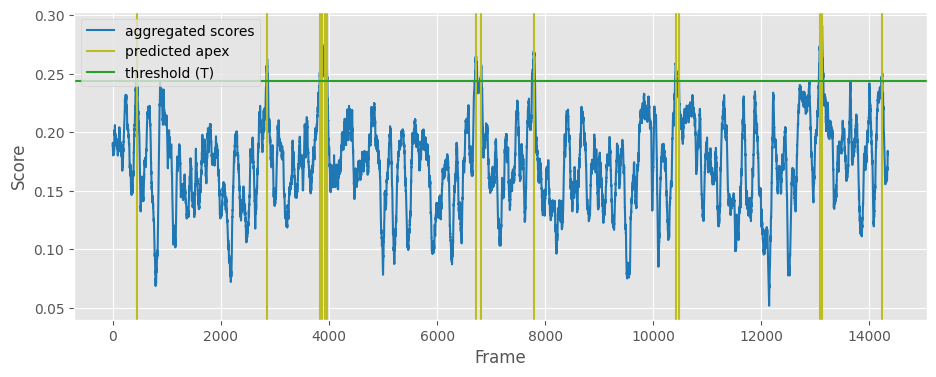

The current test video be processed: 001_2
test video 1/5 is processed.

test video 2/5 is in process.


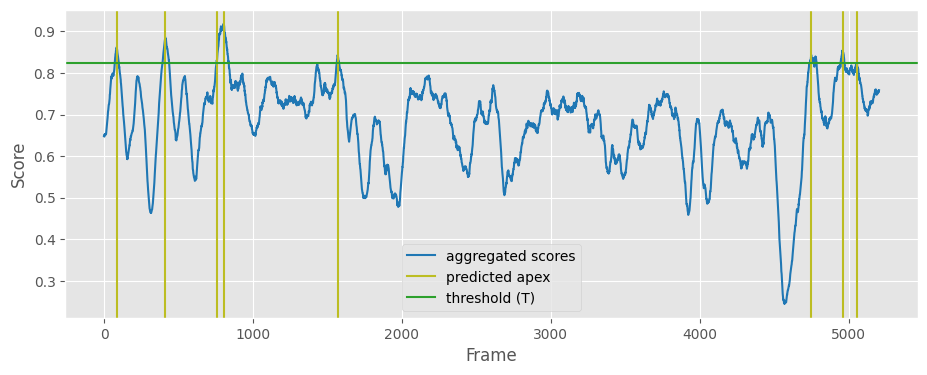

The current test video be processed: 002_4
test video 2/5 is processed.

test video 3/5 is in process.


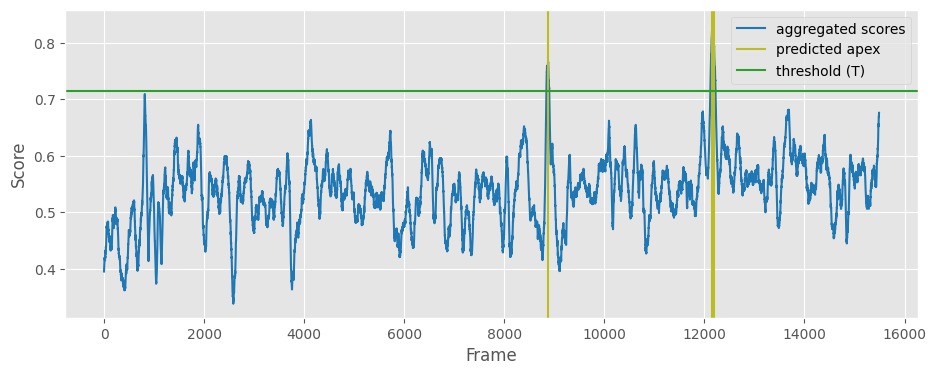

The current test video be processed: 003_1
test video 3/5 is processed.

test video 4/5 is in process.


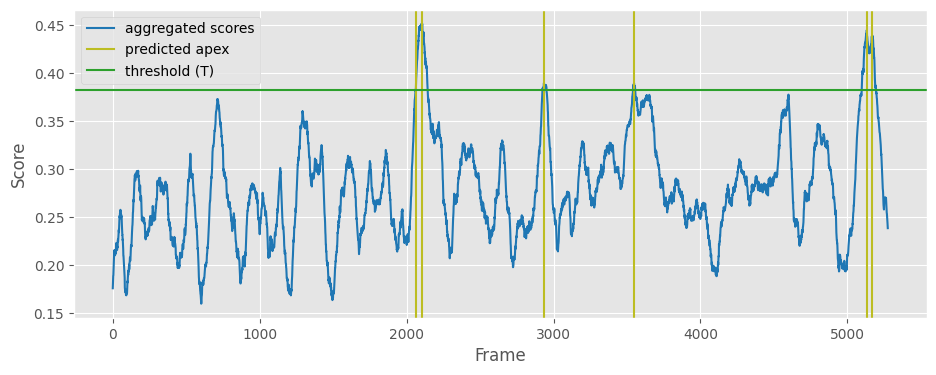

The current test video be processed: 004_3
test video 4/5 is processed.

test video 5/5 is in process.


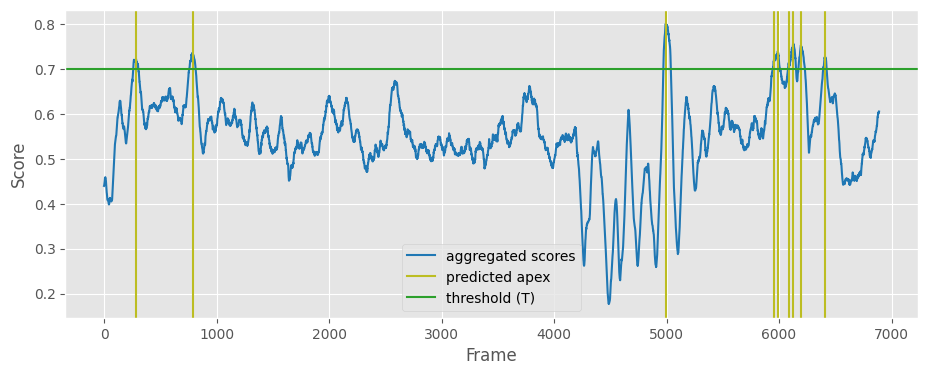

The current test video be processed: 005_7
test video 5/5 is processed.



In [38]:
test_videos_preds = spotting.spot_test(
    preds=preds, k=k, p=0.60, test_videos_name=test_videos_name, show_plot_or_not=True
)

In [39]:
# print for csv submission
# print("vid,pred_onset,pred_offset,type")
for test_video_name, test_video_preds in zip(test_videos_name, test_videos_preds):
    if len(test_video_preds) != 0:
        for test_video_pred in test_video_preds:
            print(
                f"{test_video_name},{test_video_pred[0]},{test_video_pred[1]},{expression_type}"
            )

001_2,441,515,me
001_2,2856,2930,me
001_2,3830,3904,me
001_2,3871,3945,me
001_2,3922,3996,me
001_2,3964,4038,me
001_2,6723,6797,me
001_2,6818,6892,me
001_2,7790,7864,me
001_2,10416,10490,me
001_2,10471,10545,me
001_2,13078,13152,me
001_2,13123,13197,me
001_2,14233,14307,me
002_4,84,158,me
002_4,412,486,me
002_4,757,831,me
002_4,804,878,me
002_4,1569,1643,me
002_4,4749,4823,me
002_4,4962,5036,me
002_4,5055,5129,me
003_1,8876,8950,me
003_1,12157,12231,me
003_1,12194,12268,me
004_3,2061,2135,me
004_3,2106,2180,me
004_3,2935,3009,me
004_3,3548,3622,me
004_3,5132,5206,me
004_3,5171,5245,me
005_7,284,358,me
005_7,789,863,me
005_7,4994,5068,me
005_7,5952,6026,me
005_7,5989,6063,me
005_7,6085,6159,me
005_7,6125,6199,me
005_7,6195,6269,me
005_7,6405,6479,me
